In [1]:
# ignore pandas sql engine warning - it is being fixed by pandas team
import warnings
warnings.filterwarnings("ignore")

from states import state_analysis #self made module containing all the code for the functions used below

# set folder location
import os
data_location = 'C:/Users/tasbe/OneDrive/Desktop/job_search/career_change/portfolio_projects/covid_learning/'
school_status_data = os.chdir(data_location + "/images")

from datetime import datetime

In [2]:
california = state_analysis("california") # create object to use for analysis
state_df = california.state_query() #query the database to get information related to state

#### Use Of Online Platforms By District

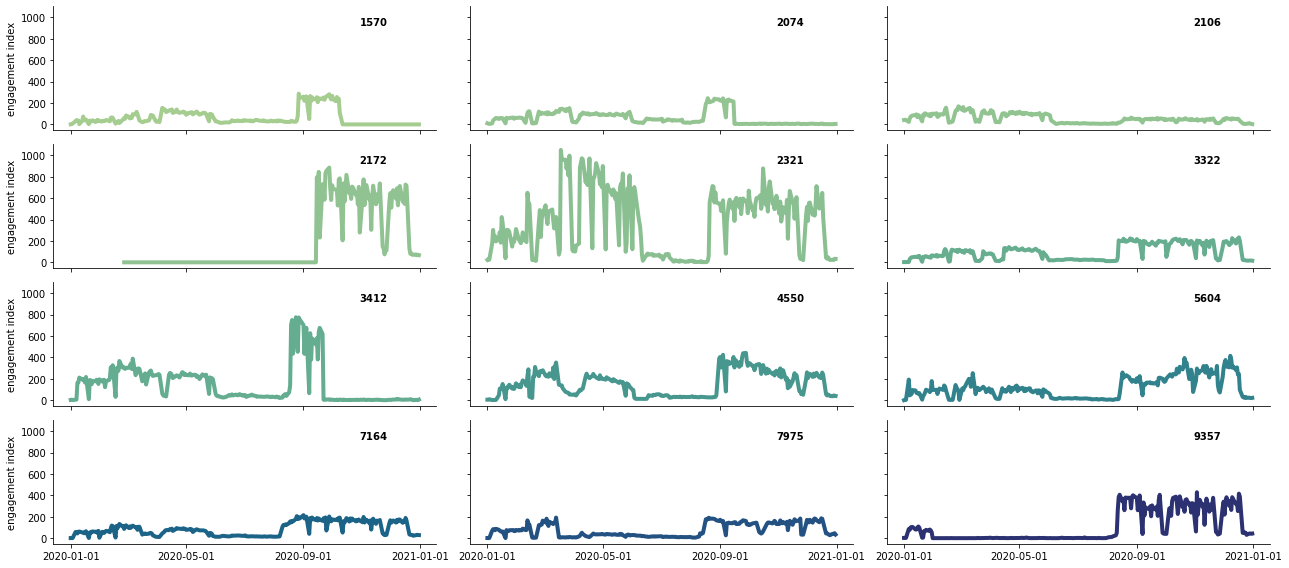

In [3]:
california.by_district(state_df) # plots each district in a state separately

From the graphs above, it is evident that there were apparent differences in online use between districts. For example, district 3412 has no online use in the 19-20 school year but shows consistent use the following year. District 7164 shows almost the opposite patterns, consistent use in the 19-20. They then had a significant spike in use in the 20-21 school year and then apparently did not use online platforms at all. Both could be due to starting or stopping the use of the Learn Platform program. However, there are also vast differences in usage between many other districts. District 2321 uses online platforms consistently, while many communities have very little use.

### Online Engagement Before and After Covid
##### Explores the question:

* Is there an increase or a decrease in online product activity during online learning?

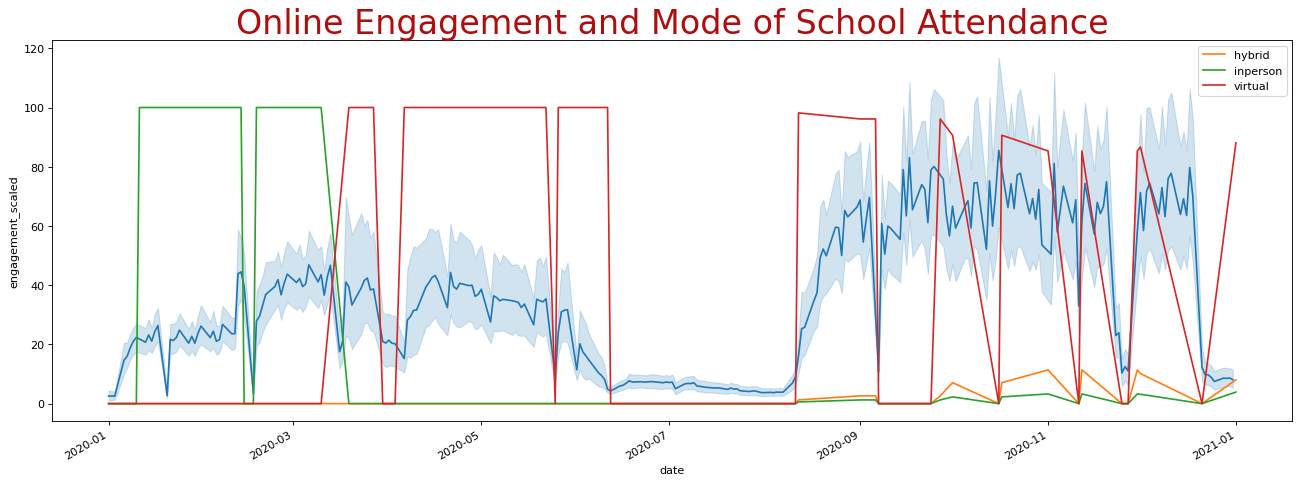

In [4]:
california.engagment_2020("california", state_df, 4) # plots online engagement and learning mode, engagement was scaled

In California, it does not look like there was a drastic increase in engagement with online platforms in the 19-20 school year - even after schools closed due to Covid. However, there is a noticeable difference in Edtech usage at the beginning of the 20-21 school year. This is likely due to some schools learning from the previous school year and making changes to start the 20-21 school year. In the 20-21 school year, there is more use of online platforms after more schools move to hybrid and in-person learning.

### Most Used Products in California

#### Explores the questions:

* Which programs had the most engagement in each state?
* How did program usage change after schools were affected by the Covid Pandemic?

In [5]:
covid_string = "2020-03-15"
covid = datetime.fromisoformat(covid_string)
before_covid = state_df .loc[state_df['date'] < covid].reset_index(drop=True)
after_covid = state_df.loc[state_df['date'] > covid].reset_index(drop=True)

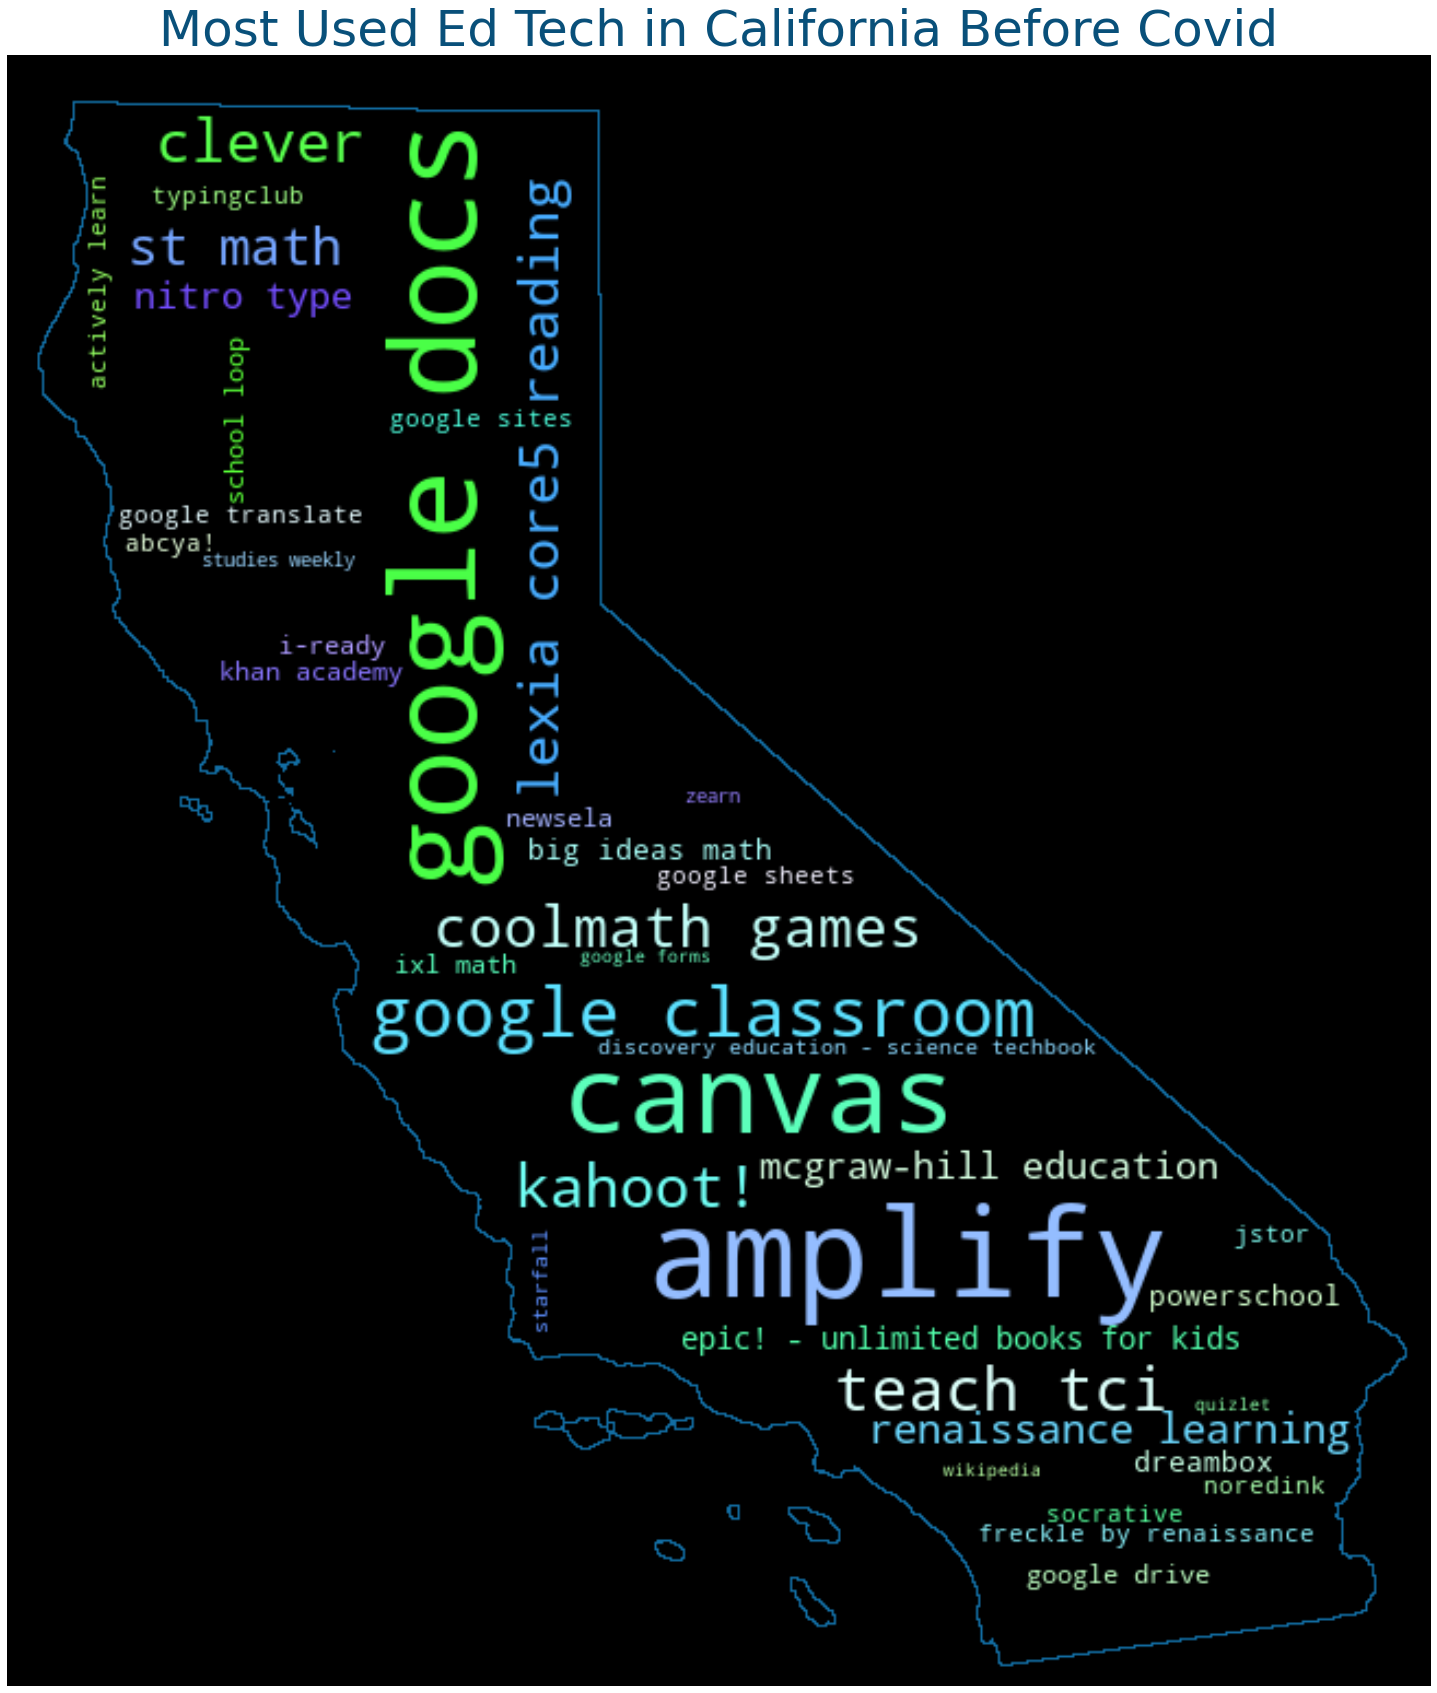

In [6]:
#word cloud showing most used products before the start of Covid 
california.state_cloud(before_covid, color = '#09507a', contour = '#126ca1', img = 'california.PNG',
                       title = "Most Used Ed Tech in California Before Covid") 

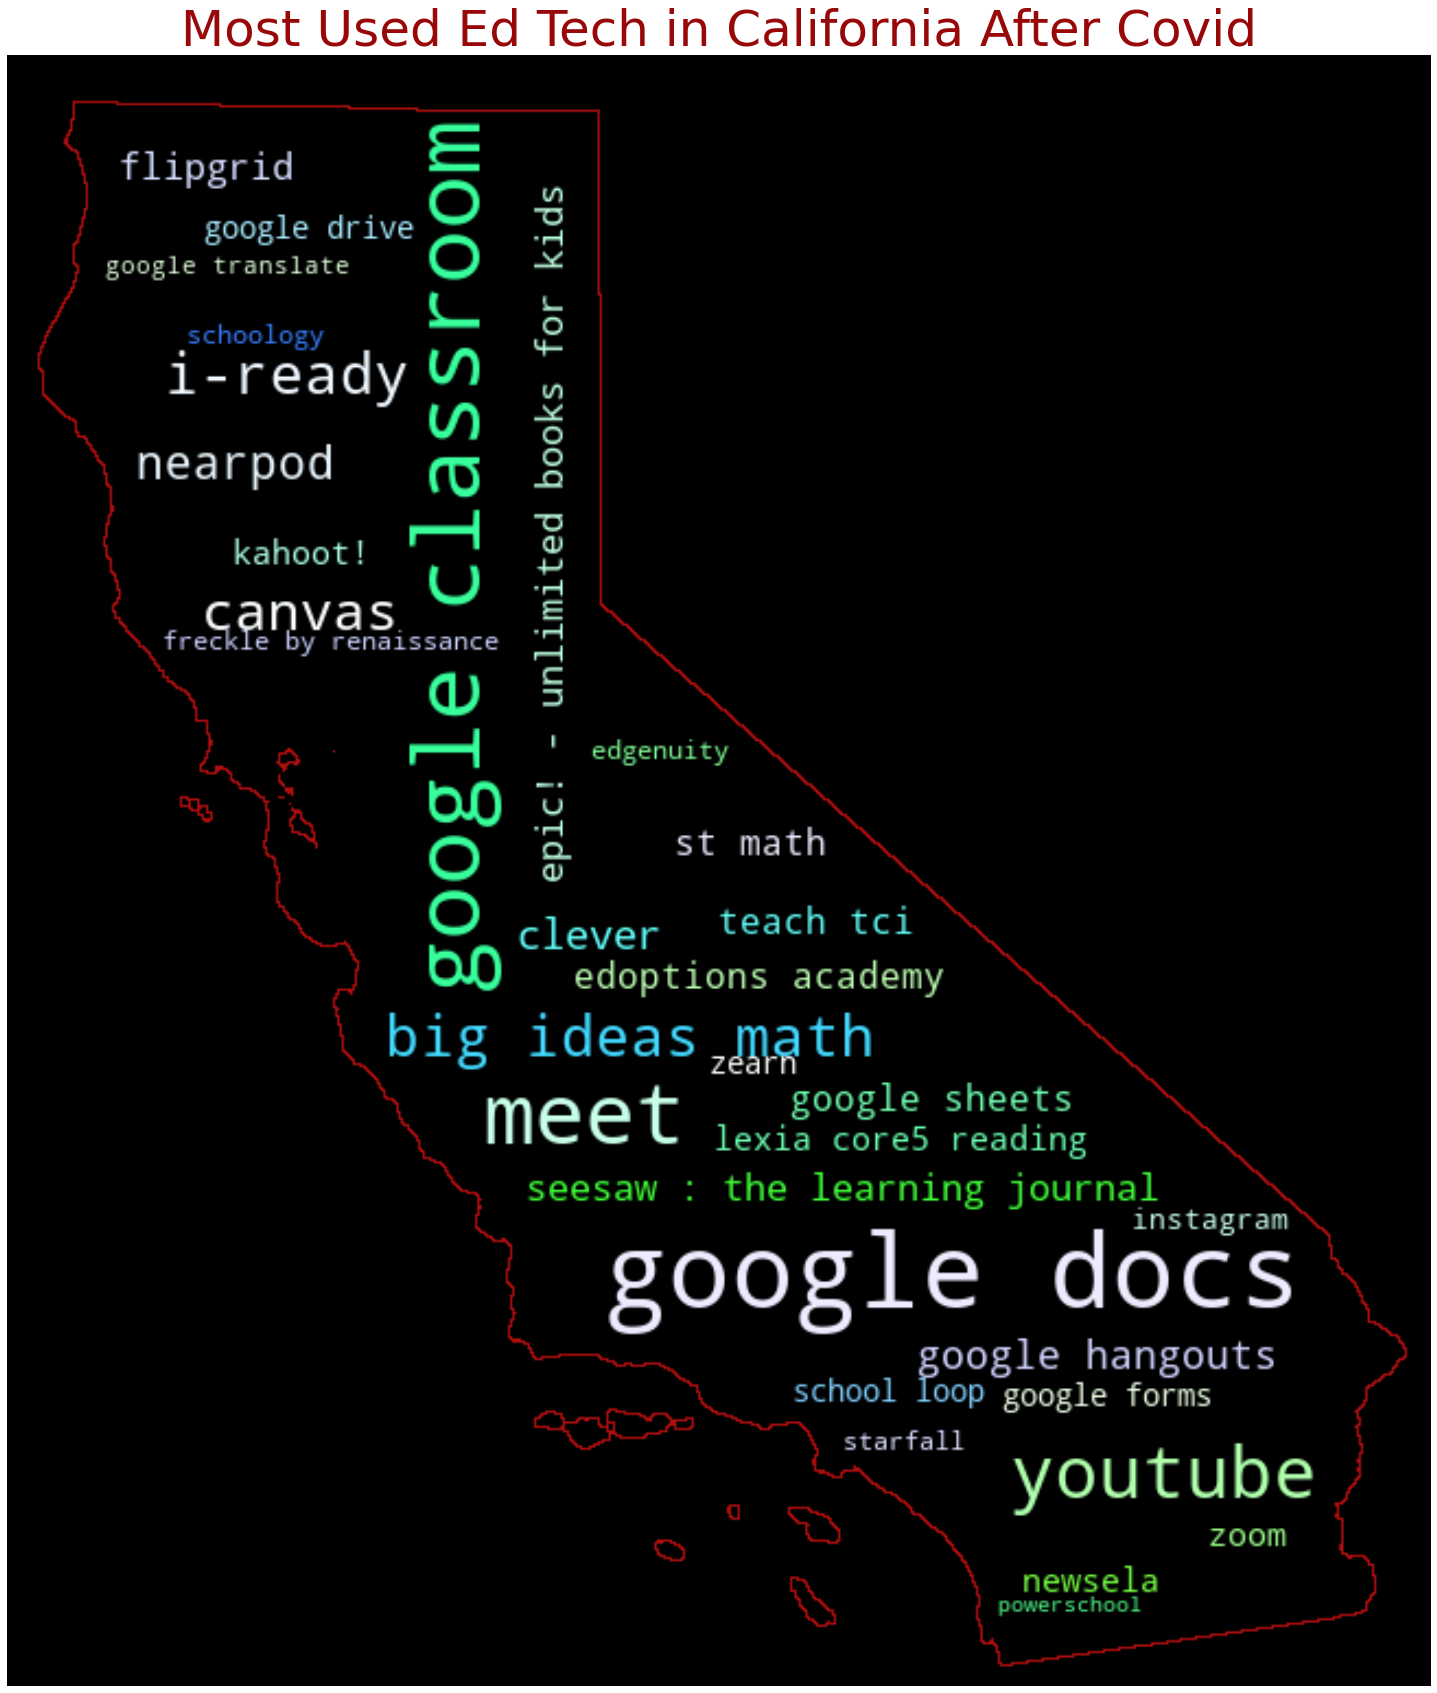

In [7]:
#word cloud showing most used products after the start of Covid
california.state_cloud(after_covid, color = '#990808', contour = '#b00e0e', img = 'california.PNG',
                       title = "Most Used Ed Tech in California After Covid") 

The word clouds make it apparent that Covid affected the choice of the EdTech used by students and teachers. Learning Management Systems that allow teachers to post lessons, including videos and materials, became more prominent after March 2020. In addition, Google products were more widely used. I would have been surprised if these changes had not been seen in the data. However, there were other changes as well. The range of Edtech used seems to be reduced after Covid affected schools, which I would not have predicted. There were also changes in some of the particular platforms being used. For example, Schoology, Seesaw and Newsela are only seen in the word cloud depicting usage after March 2020.

### Online Learning And Demographics

##### Explores the question: 

* What is the correlation between each of the demographic factors and engagement with online platforms?

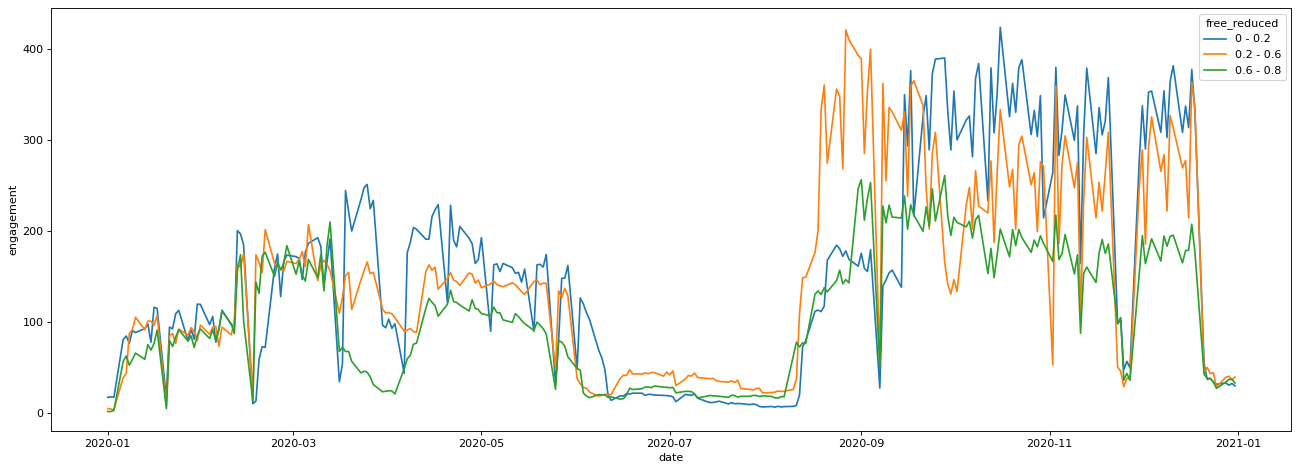

In [8]:
# There is only one district with 40% - 60% of students receiving free and reduced lunch
# This category will be combined with the 20% - 40% category
replace = {'0.2 - 0.4': '0.2 - 0.6','0.4 - 0.6': '0.2 - 0.6'}
california.lunch_line(state_df, replace) # line graph showing online engagement by free_reduced lunch category

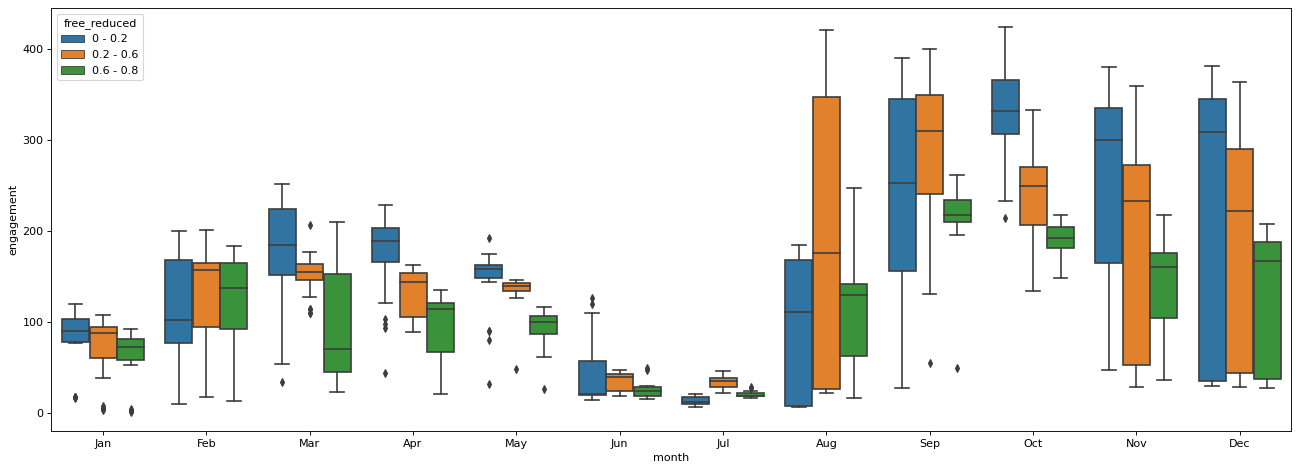

In [9]:
# There is only one district with 40% - 60% of students receiving free and reduced lunch
# This category will be combined with the 20% - 40% category
replace = {'0.2 - 0.4': '0.2 - 0.6','0.4 - 0.6': '0.2 - 0.6'}
california.lunch_box(state_df, replace) # box plot showing online engagement by free_reduced lunch category

Before schools closed for Covid, the use of online platforms was similar for all schools regardless of the percentage of students receiving free and reduced lunch. However, after schools closed due to Covid, there was a significant gap between schools with 0.6 - 0.8 of students receiving free and reduced lunch and schools with fewer students who qualified for these programs. For most of the beginning of the 20-21 school year, there was a much wider distribution of online engagement for schools with less than 60% of their students receiving free and reduced lunch.

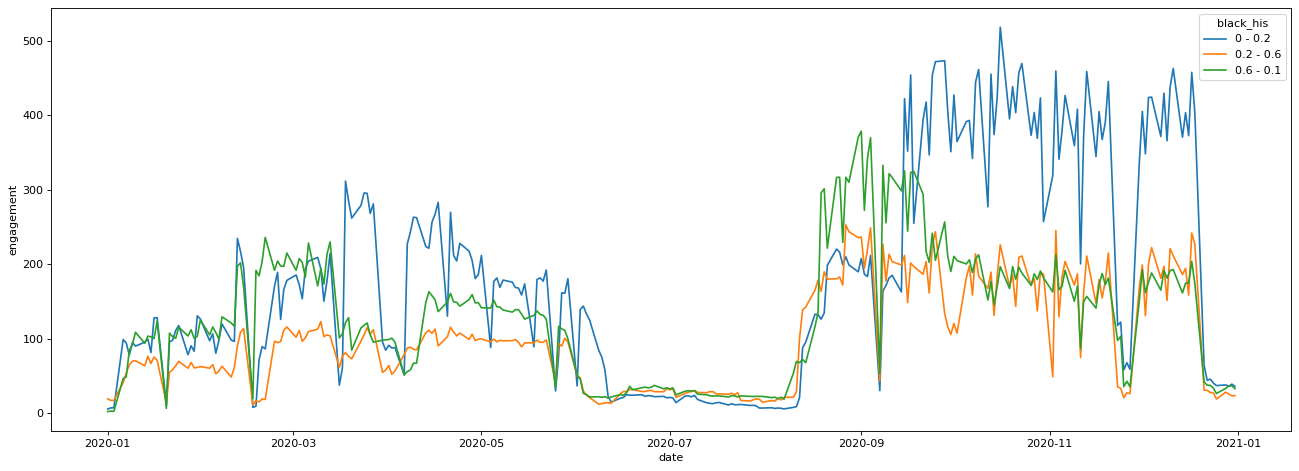

In [10]:
replace = {'0.2 - 0.4': '0.2 - 0.6', '0.4 - 0.6': '0.2 - 0.6', '0.8 - 1': '0.6 - 0.1', '0.6 - 0.8': '0.6 - 0.1'}
california.black_his_line(state_df, replace) # line graph showing online engagement by black_his category

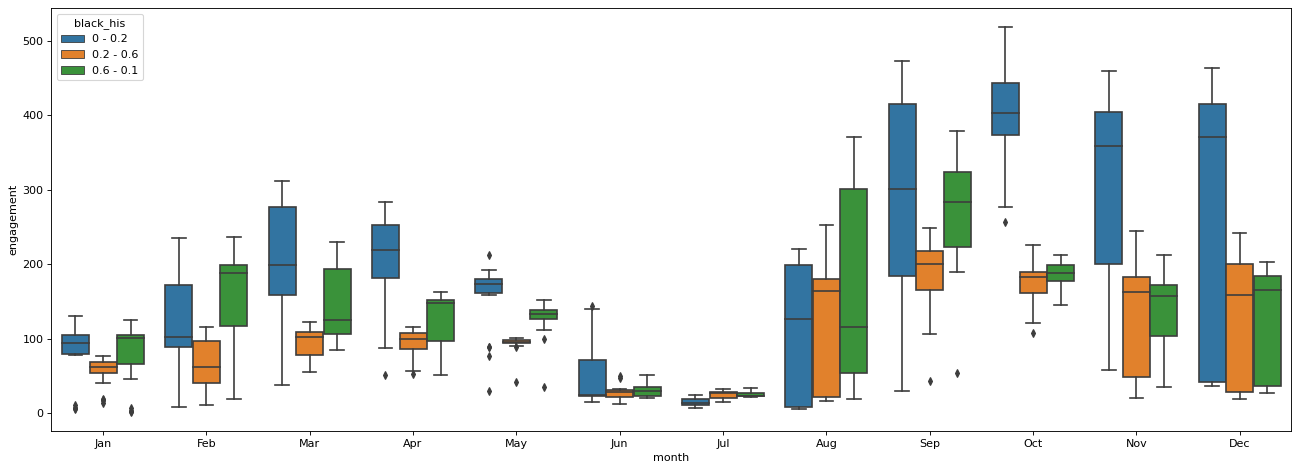

In [11]:
replace = {'0.2 - 0.4': '0.2 - 0.6', '0.4 - 0.6': '0.2 - 0.6', '0.8 - 1': '0.6 - 0.1', '0.6 - 0.8': '0.6 - 0.1'}
california.black_his_box(state_df, replace) # box plot showing online engagement by black_his category

Before Covid, schools with 20% - 60% of students who were black or Hispanic had less online engagement than schools with either a higher or lower percentage of black or Hispanic students. After school closures related to Covid, schools with less than 20% of students who were black or Hispanic had significantly more engagement in online learning platforms. There was more alignment in the use of Edtech at the beginning of the 20-21 school year. However, this was not maintained. In October, there was a significant increase in the use of digital tools in schools whose student make-up consisted of less than 20% of students who were black or Hispanic. This continued through the end of the 2020 calendar year.

#### Exploratory Analysis

The cells below were run as part of the exploratory analysis. They were originally run before the analysis above, but were moved to the bottom of the notebook after the analysis was completed.

In [12]:
def demographic_values(state_df):
    demographics_df = state_df[['district', 'locale', 'black_his', 'free_reduced', 'expend']].drop_duplicates()
    print(demographics_df)

In [13]:
california.demographic_values(state_df)

      district  locale  black_his free_reduced expend
0         7164    city  0.6 - 0.8    0.6 - 0.8   None
352       7975    city  0.6 - 0.8    0.6 - 0.8   None
717       9357    city  0.4 - 0.6    0.2 - 0.4   None
900       3322    city    0 - 0.2      0 - 0.2   None
1266      2172    city    0 - 0.2      0 - 0.2   None
1519      1570  suburb  0.2 - 0.4    0.2 - 0.4   None
1783      4550    city    0.8 - 1    0.6 - 0.8   None
2102      2106  suburb  0.2 - 0.4      0 - 0.2   None
2309      2321   rural    0 - 0.2      0 - 0.2   None
2590      3412    city  0.6 - 0.8    0.4 - 0.6   None
2841      5604  suburb    0 - 0.2      0 - 0.2   None
3145      2074  suburb  0.4 - 0.6    0.2 - 0.4   None


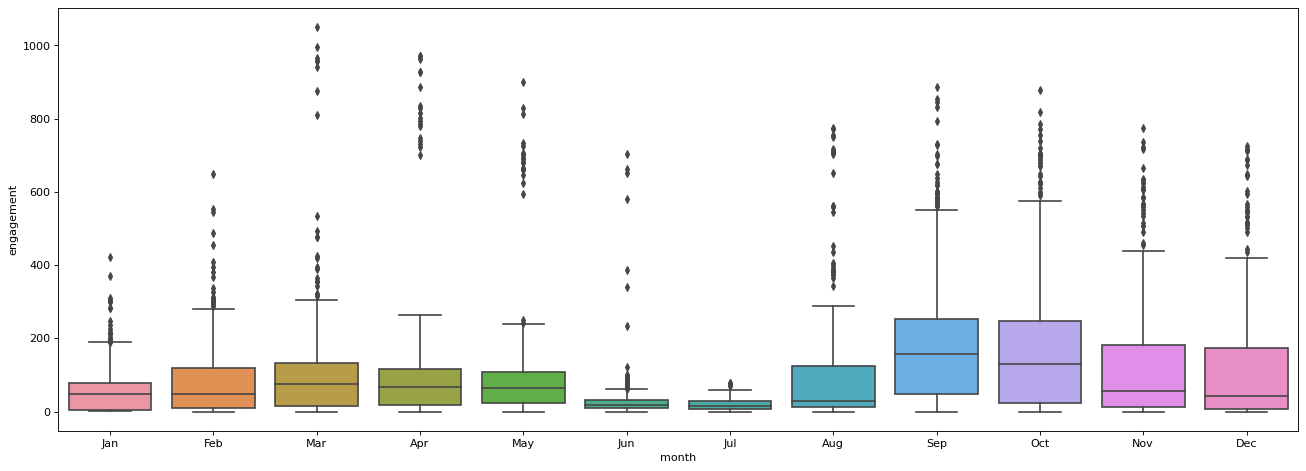

In [14]:
california.engagement_month(state_df) # create a box plot of engagement index by month,

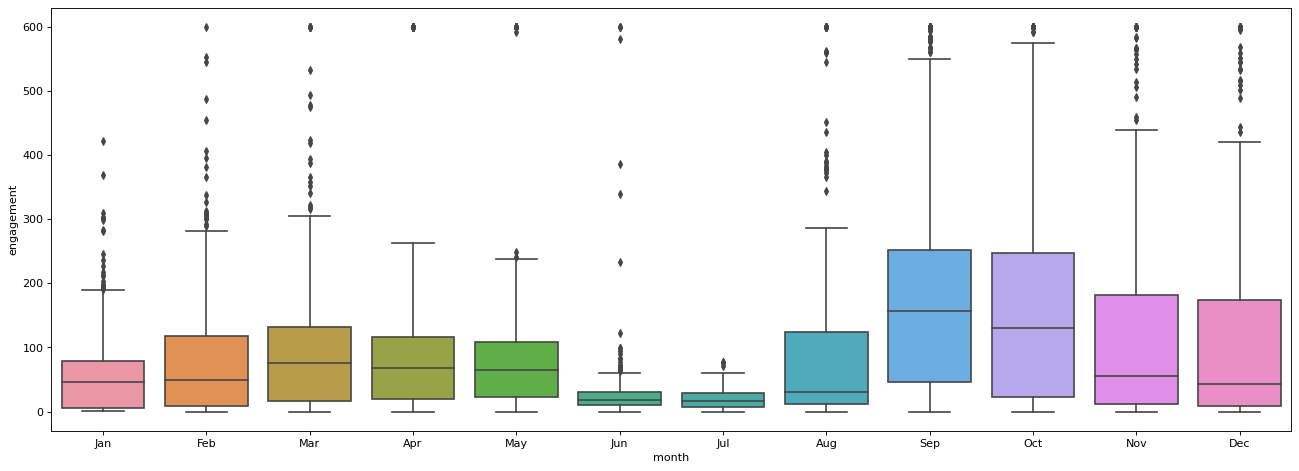

In [15]:
california.engagement_month(state_df, 600) # create a box plot of engagement index by month, outliers removed